In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import seaborn as sns

dataset_path = "/media/icnlab/Data/Manh/tinyML/FieldPlant-11/cropped"


(2765, 2765)

In [ ]:
%store -r labels image_paths

from collections import Counter
class_count = Counter(labels)
class_names = list(class_count.keys())

len(labels), len(image_paths), len(class_names)


üì¶ T·ªïng s·ªë ·∫£nh: 2765
üîñ S·ªë l·ªõp: 4
üìö Danh s√°ch l·ªõp: ['Tomato blight leaf', 'Tomato healthy', 'Tomato leaf yellow virus', 'Tomato Brown Spots']


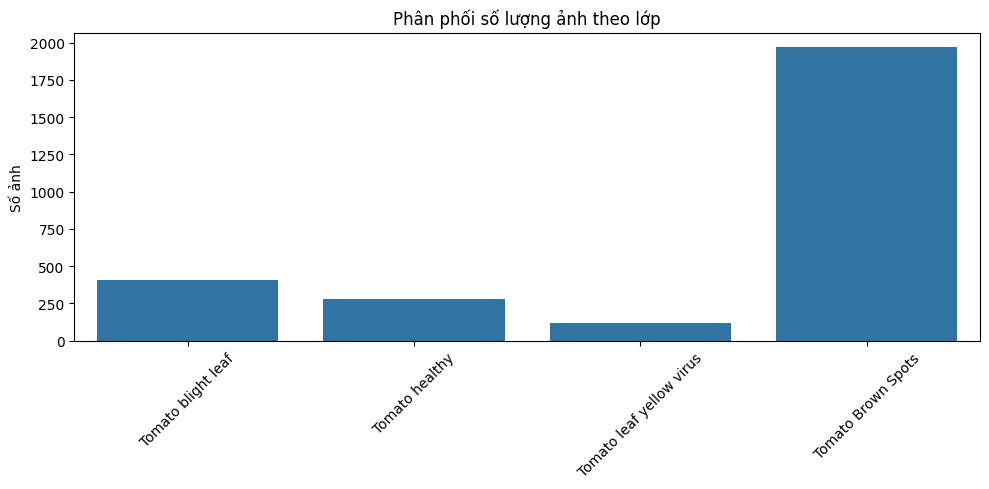

In [43]:
# B∆∞·ªõc 2: Th·ªëng k√™ t·ªïng quan
print(f"üì¶ T·ªïng s·ªë ·∫£nh: {len(image_paths)}")
print(f"üîñ S·ªë l·ªõp: {len(class_names)}")
print(f"üìö Danh s√°ch l·ªõp: {class_names}")

# B∆∞·ªõc 3: V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi s·ªë ·∫£nh theo l·ªõp
label_counts = Counter(labels)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Ph√¢n ph·ªëi s·ªë l∆∞·ª£ng ·∫£nh theo l·ªõp")
plt.xticks(rotation=45)
plt.ylabel("S·ªë ·∫£nh")
plt.tight_layout()
plt.show()

# B∆∞·ªõc 4: Hi·ªÉn th·ªã ·∫£nh v√≠ d·ª•
def show_sample_images(image_paths, labels, class_names, samples_per_class=3):
    plt.figure(figsize=(samples_per_class * 3, len(class_names) * 3))
    for class_idx, class_name in enumerate(class_names):
        class_images = [p for p, l in zip(image_paths, labels) if l == class_name][:samples_per_class]
        for i, img_path in enumerate(class_images):
            plt_idx = class_idx * samples_per_class + i + 1
            img = Image.open(img_path)
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(img)
            plt.axis('off')
            if i == 0:
                plt.ylabel(class_name, rotation=0, labelpad=60, fontsize=12)
    plt.suptitle("M·ªôt v√†i ·∫£nh v√≠ d·ª• t·ª´ m·ªói l·ªõp", fontsize=16)
    plt.tight_layout()
    plt.show()

# show_sample_images(image_paths, labels, class_names)

Ph√¢n t√≠ch ·∫£nh: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2765/2765 [00:00<00:00, 24404.53it/s]


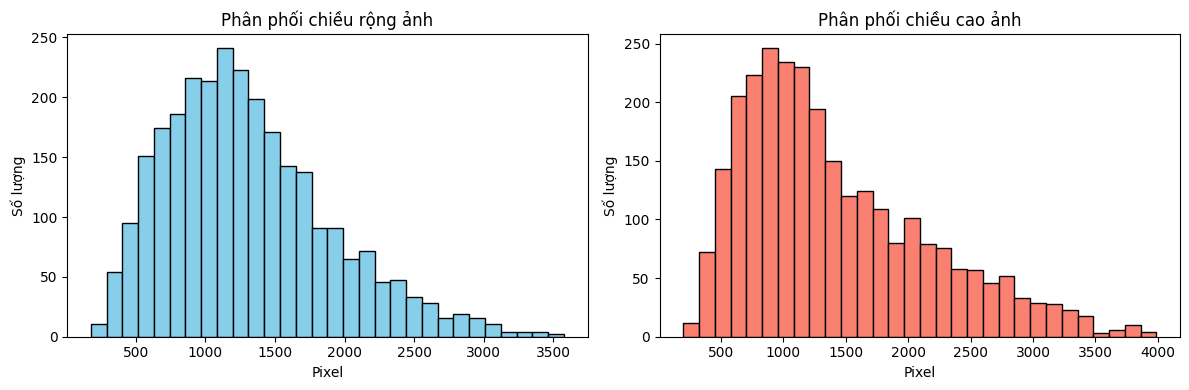

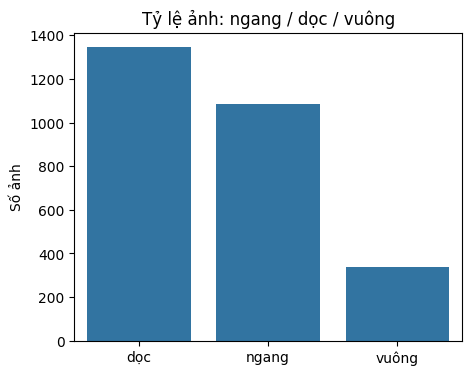

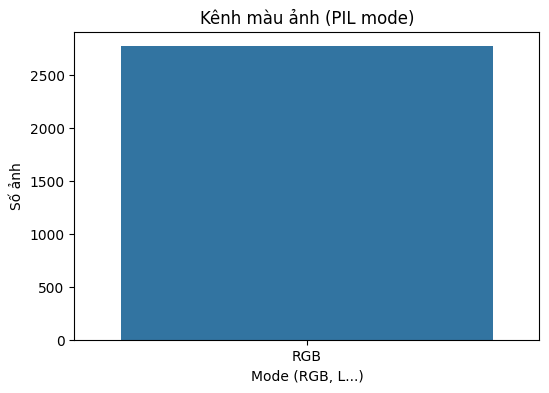

In [44]:
# Analyst image size
from tqdm import tqdm
import numpy as np

# B∆∞·ªõc 5: Ph√¢n t√≠ch k√≠ch th∆∞·ªõc ·∫£nh v√† t·ª∑ l·ªá
widths, heights, modes = [], [], []
bad_files = 0

for path in tqdm(image_paths, desc="Ph√¢n t√≠ch ·∫£nh"):
    try:
        with Image.open(path) as img:
            widths.append(img.width)
            heights.append(img.height)
            modes.append(img.mode)
    except Exception as e:
        bad_files += 1
        continue

# K√≠ch th∆∞·ªõc ·∫£nh ph·ªï bi·∫øn
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.title("Ph√¢n ph·ªëi chi·ªÅu r·ªông ·∫£nh")
plt.xlabel("Pixel")
plt.ylabel("S·ªë l∆∞·ª£ng")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.title("Ph√¢n ph·ªëi chi·ªÅu cao ·∫£nh")
plt.xlabel("Pixel")
plt.ylabel("S·ªë l∆∞·ª£ng")

plt.tight_layout()
plt.show()

# T·ª∑ l·ªá ·∫£nh: ngang, d·ªçc, vu√¥ng
ratios = np.array(widths) / np.array(heights)
ratio_categories = ["ngang" if r > 1.1 else "d·ªçc" if r < 0.9 else "vu√¥ng" for r in ratios]
ratio_counts = Counter(ratio_categories)

plt.figure(figsize=(5, 4))
sns.barplot(x=list(ratio_counts.keys()), y=list(ratio_counts.values()))
plt.title("T·ª∑ l·ªá ·∫£nh: ngang / d·ªçc / vu√¥ng")
plt.ylabel("S·ªë ·∫£nh")
plt.show()

# B∆∞·ªõc 6: Ph√¢n t√≠ch k√™nh m√†u (mode: RGB, L, v.v.)
mode_counts = Counter(modes)
plt.figure(figsize=(6, 4))
sns.barplot(x=list(mode_counts.keys()), y=list(mode_counts.values()))
plt.title("K√™nh m√†u ·∫£nh (PIL mode)")
plt.xlabel("Mode (RGB, L...)")
plt.ylabel("S·ªë ·∫£nh")
plt.show()

# B√°o c√°o s·ªë ·∫£nh l·ªói
if bad_files > 0:
    print(f"‚ö†Ô∏è C√≥ {bad_files} ·∫£nh kh√¥ng th·ªÉ m·ªü ƒë∆∞·ª£c (c√≥ th·ªÉ b·ªã h·ªèng).")

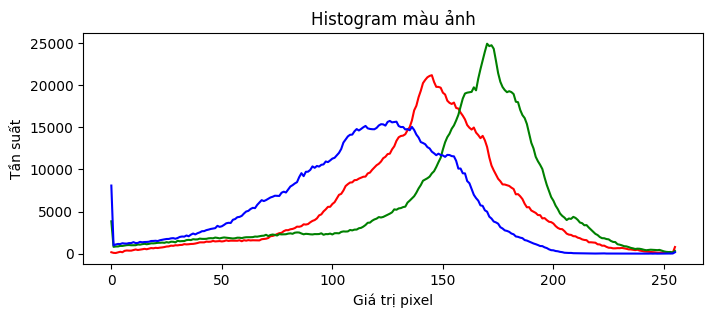

In [45]:
# Analyst histogram 1 image
def plot_color_histogram(image_path):
    img = Image.open(image_path).convert("RGB")
    channels = img.split()
    colors = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 3))
    for channel, color in zip(channels, colors):
        hist = channel.histogram()
        plt.plot(hist, color=color)
    plt.title("Histogram m√†u ·∫£nh")
    plt.xlabel("Gi√° tr·ªã pixel")
    plt.ylabel("T·∫ßn su·∫•t")
    plt.show()

plot_color_histogram(image_paths[0])

T√≠nh ƒë·ªô s√°ng / t∆∞∆°ng ph·∫£n: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:14<00:00, 35.64it/s]


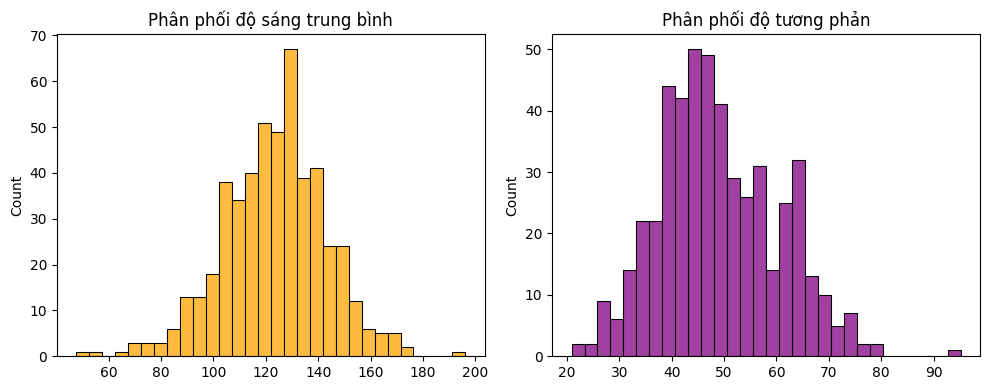

In [46]:
# Analyst 
def compute_brightness_contrast(img):
    grayscale = img.convert("L")
    arr = np.array(grayscale)
    brightness = arr.mean()
    contrast = arr.std()
    return brightness, contrast

brightness_list, contrast_list = [], []
for path in tqdm(image_paths[:500], desc="T√≠nh ƒë·ªô s√°ng / t∆∞∆°ng ph·∫£n"):  # gi·ªõi h·∫°n 500 ·∫£nh cho nhanh
    try:
        img = Image.open(path)
        b, c = compute_brightness_contrast(img)
        brightness_list.append(b)
        contrast_list.append(c)
    except:
        continue

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(brightness_list, bins=30, color="orange")
plt.title("Ph√¢n ph·ªëi ƒë·ªô s√°ng trung b√¨nh")

plt.subplot(1, 2, 2)
sns.histplot(contrast_list, bins=30, color="purple")
plt.title("Ph√¢n ph·ªëi ƒë·ªô t∆∞∆°ng ph·∫£n")
plt.tight_layout()
plt.show()


In [47]:
import imagehash

hashes_phash = {}
duplicates_phash = []

for path in tqdm(image_paths, desc="pHash ·∫£nh"):
    try:
        img = Image.open(path)
        h = imagehash.phash(img)
        if h in hashes_phash:
            duplicates_phash.append((hashes_phash[h], path))
        else:
            hashes_phash[h] = path
    except:
        continue

print(f"üîç S·ªë ·∫£nh tr√πng theo pHash: {len(duplicates_phash)}")

pHash ·∫£nh: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2765/2765 [01:03<00:00, 43.55it/s]

üîç S·ªë ·∫£nh tr√πng theo pHash: 4


üìä T·ªâ l·ªá m·∫•t c√¢n b·∫±ng: l·ªõn nh·∫•t / nh·ªè nh·∫•t = 1967 / 115 = 17.10


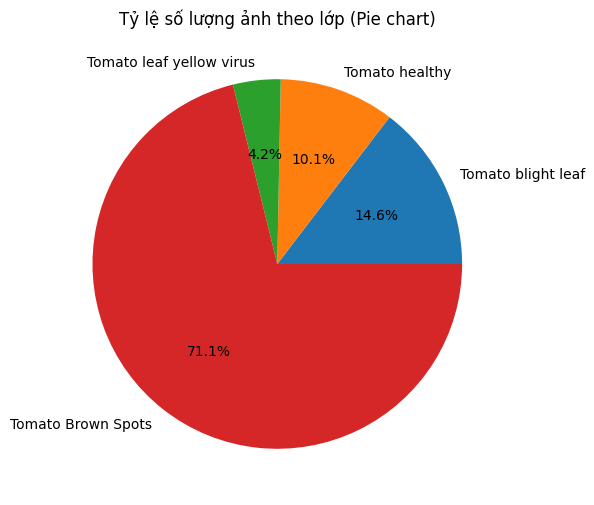

In [48]:
# check class imbalance
max_class = max(label_counts.values())
min_class = min(label_counts.values())
print(f"üìä T·ªâ l·ªá m·∫•t c√¢n b·∫±ng: l·ªõn nh·∫•t / nh·ªè nh·∫•t = {max_class} / {min_class} = {max_class / min_class:.2f}")

plt.figure(figsize=(6, 6))
plt.pie(label_counts.values(), labels=label_counts.keys(), autopct='%1.1f%%')
plt.title("T·ª∑ l·ªá s·ªë l∆∞·ª£ng ·∫£nh theo l·ªõp (Pie chart)")
plt.show()